## Course summary

- Understand industry best-practicces for building deep learning applications.
- Be able to effectively use the common neural network "tricks", including initialization, L2, and dropout regularization, Batch normalization, gradient checking.
- Be able to implement and apply a variety of optimization algorithms, such as mini-batch gradient descent, Momentum, RMSprop, and Adam, and check for their convergence.
- Understan new best-practices for the deep learning era of how to set up train/dev/test sets and analyze bias/ variance
- Be able to implement a neural network in TensorFlow

### Train/ Dev/ Test sets
- Its impossible to get all your hyperparamets right on a new application from the first time.
- So the idea is you go through the loop: Idea => code => Experiment.
- You have to go through the loop many times to figure out your hyperparameters. 

<img src="img/Screen%20Shot%202019-01-20%20at%2011.31.33.png">

- The trend on the ratio of splitting the models:
  - If size of the dataset is 100 to 1000000 => 60/20/20
  - If size of the dataset is 1000000 to INF => 98/1/1 or 99.5/0.25/0.25
- The trend now gives the training data the biggest sets

<img src="img/Screen%20Shot%202019-01-20%20at%2011.38.51.png">

### Bias/ Variance

- Bias/ Variance techniques are Easy to learn, but diffcult to master
- So here the explanation of Bias/ Variance:
   - If your model is underfitting (logistic regression of non linear data) it has a "high bias"
   - If your model is overfitting then it has a "high variance"
   - Your model will be alright if you balance the Bias/ Variance
   - For more:
 
 <img src="img/Screen%20Shot%202019-01-20%20at%2012.17.39.png">
- Another idea to get the bias/ variance if you dont have a 2D plotting mechanism:
  -  High variance (overfitting) for example:
     - Training error: 1%
     - Dev error:11%
  - High Bias (underfitting) for example:
     - Training error:15%
     - Dev error: 14%
  - high Bias (underfitting) & High variance ( overfitting) for example:
     - Training error: 15%
     - Test error: 30%
  - Best:
     - Training error: 0.5%
     - Test error: 1%
  - These  Assumptions came from that human has 0% error. If the problem isnt like that you'll need to use human error as baseline
  
<img src="img/Screen%20Shot%202019-01-20%20at%2012.10.35.png">

- High bias because it was mostly linear but you need maybe a curve function or quadratic function.
- High variance because it had too much flexibility to fit those two mislabel,  

### Basic recipe for machine learning
- If your algorithm has a high bias:
  -  Try to make your NN bigger (size of hidden units, number of layers)
  - Try a different model that is suitable for your data
  - Try to run it longer
  - Different (advanced) optimization algorithms.
- If your algorithms has a high variance:
  - More data
  - Try regularization.
  - Try a different model that is suitable for your data.
 
-  You should try the previous two points until you have a low bias and low variance.
- "Bias variance tradeoff": increase bias and reduce variance/ reduce bias and inscrease variance.
- Training a bigger neural network never hurts and the main cost of training a neural network that's too big is just computation time.


## Regularizing your neural network
- Adding regularization to NN will help it reduce variance (overfitting)

<img src="img/Screen%20Shot%202019-01-20%20at%2018.31.16.png">

  Lamda is called the regularization parameter

  <img src="img/Screen%20Shot%202019-01-20%20at%2023.10.38.png">

And usually, you set this using your development set, or using cross validation.
- You divide your training data, you train your model for a fixed value of lamda and test it on the remaining subsets and repeat this procedure while varying lamda. Then you select the best lamda that minimizes your loss function.

Regularization for logistic regression:
 - The normal cost function that we want to minimize is: J(w,b) = (1/m) * Sum(L(y'(i),y(i)))
 - The L2 regularization version: J(w,b) = (1/m) * Sum(L(y(i), y'(i))) + (lambda/2m) * Sum(|w[i]|^2)
 - The L1 regularization version: J(w,b) = (1/m) * Sum(L(y(i), y'(i))) + (lambda/2m) * Sum(|w[i]|)
 - The L1 regularization version makes a lot of w values become zeros, which makes the model size smaller.
 - L2 regularization is being used much more often.
 

- Regularization for NN:
  - The normal cost function that we want to minimize is:
      - J(W1, b1, . ..,WL,bL) = (1/m) * Sum(L(y(i), y'(i)))
  - The L2 regularization version:
     - J(w,b) = (1/m) * Sum(L(y(i), y'(i))) + (lambda/2m) * Sum((||W[l]||^2)
  - To do back propagation:
    - dw[l] = (from back propagation) + lambda/m * w[l]
  - So plugging it in weight update step:
    <img src="img/Screen%20Shot%202019-01-20%20at%2023.58.04.png">

The new term (1 - (learning_rate * lambda )/ m ) * w[l] causes the weight to decay in proportion to its size.

### Why regularization reduces overfitting?
Here are some intuitions:
- Intuition 1:
   - If lambda is too large - a lot of w's will be close to zeros which will make the NN simpler (you can think of it as it would behave closer to logistic regression).
   <img src="img/Screen%20Shot%202019-01-21%20at%200.50.40.png">
   - If lambda is good enough it will just reduce some weights that makes the neural network overfit.
- intuition2 (with tanh activation function):
   - If lambda is too large, w's will be small (close to zero) - will use the linear part of the tanh activation function, so we will go from non linear activation to roughly linear which would make the NN a roughly linear classifier.
   
   <img src="img/Screen%20Shot%202019-01-21%20at%200.56.43.png">
   - If lambda good enough it will just make some of tanh activations roughly linear which will prevent overfitting.

Implementation tip: if you implement gradient descent, one of the steps to debug gradient descent is to plot the cost function J as a function of the number of iterations of gradient descent and you want to see that the cost function J decreases monotonically after every elevation of gradient descent with regularization. If you plot the old definition of J (no regularization) then you might not see it decrease monotonically.

### Dropout Regularization
- The dropout regularization eliminates some neurons/weights on each iteration based on a probability.
- A most common technique to implement dropout is called "Inverted dropout".
 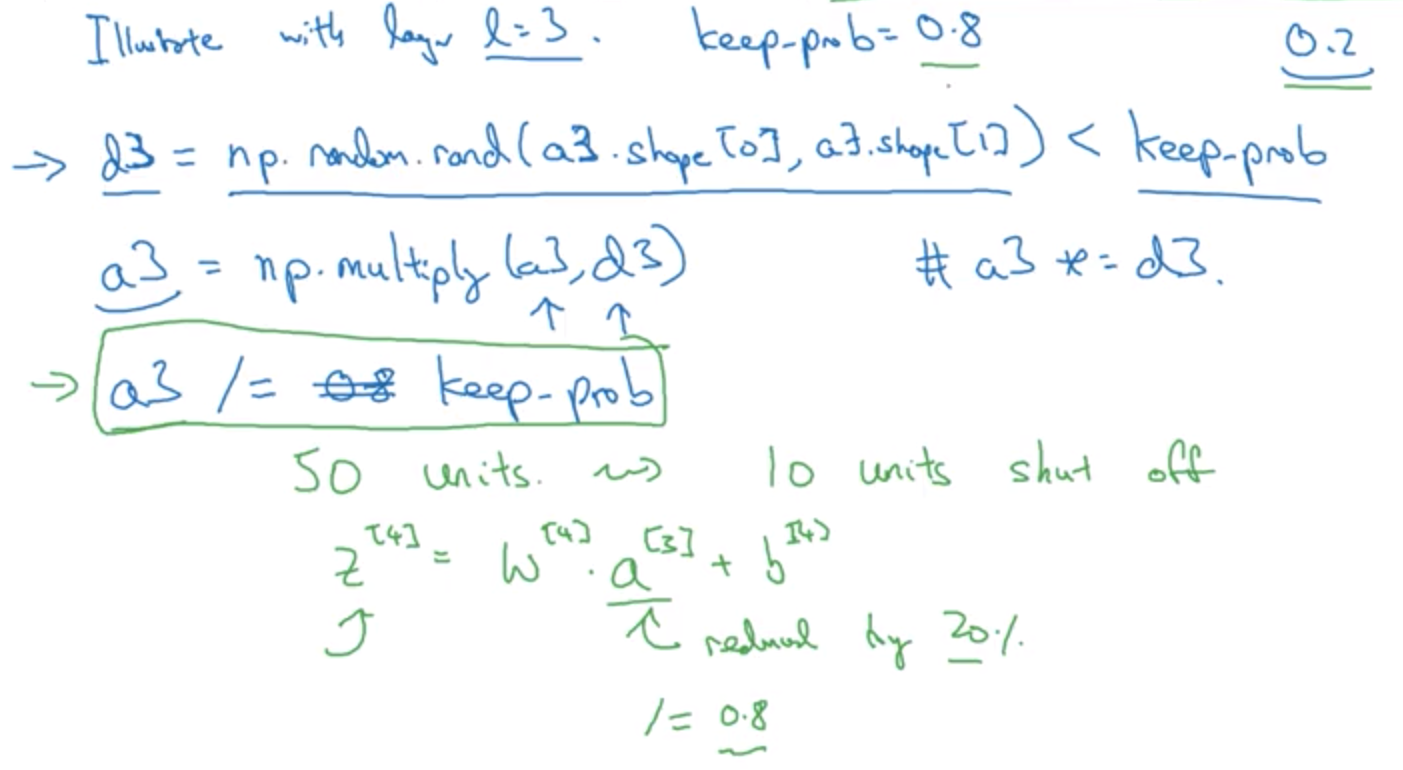

At test time we don't use dropout. If you implement dropout at test time - it would add noise to predictions.

### Why does drop-out work?
- Intuition: Cant rely on any one feature because any one feature could go away at random, so have to spread out weights.
- Dropout can have different keep_prob per layer.

<img src="img/Screen%20Shot%202019-01-21%20at%201.24.29.png">
- A lot of researchers are using dropout with Computer Vision (CV) because they have a very big input size and almost never have enough data, so overfitting is the usual problem. And dropout is a regularization technique to prevent overfitting.

- A downside of dropout is that the cost function J is not well defined and it will be hard to debug (plot J by iteration). To solve that you'll need to turn off dropout, set all the keep_probs to 1, and then run the code and check that it monotonically decreases J and then turn on the dropouts again.

### Other regularization methods
- Data augmentation:
   - For example in a computer vision data:
       -  You can flip all your pictures horizontally this will give you m more data instances.
       -  You could also apply a random position and rotation to an image to get more data.
   - For example in OCR, you can impose random rotations and distortions to digits/letters.
- Early stopping:
   -  In this technique we plot the training set and the dev set cost together for each iteration. At some iteration the dev set cost will stop decreasing and will start increasing.
   - We will pick the point at which the training set error and dev set error are best (lowest training cost with lowest dev cost).
   - What early stopping does is by stopping halfway you have only a mid-size rate w.  And so similar to L2 regularization by picking a neural network with smaller norm. 

   <img src="img/Screen%20Shot%202019-01-21%20at%201.48.17%20%282%29.png">

- Andrew prefers to use L2 regularization instead of early stopping because this technique simultaneously tries to minimize the cost function and not to overfit which contradicts the orthogonalization approach (will be discussed further).
## Setting up your optomization problem
### Normalizing inputs
- If you normalize your inputs this will speed up the training process a lot.
- Normalization are going on these steps:
  - Get the mean of the training set: mean = (1/m) * sum(x(i))
  - Subtract the mean from each input: X = X - mean
     - This makes your inputs centered around 0.
  - Get the variance of the training set: variance = (1/m) * sum(x(i)^2)
  - Normalize the variance. X /= variance
  <img src="img/Screen%20Shot%202019-01-21%20at%202.00.31.png">
 - Why normalize?
    - If we don't normalize the inputs our cost function will be deep and its shape will be inconsistent (elongated) then optimizing it will take a long time.
    - But if we normalize it the opposite will occur. The shape of the cost function will be consistent (look more symmetric like circle in 2D example) and we can use a larger learning rate alpha - the optimization will be faster.   
  <img src="img/Screen%20Shot%202019-01-21%20at%202.02.21.png">

### Vanish/ Exploding gradients
- The Vanishing / Exploding gradients occurs when your derivatives become very small or very big.
- To understand the problem, suppose that we have a deep neural network with number of layers L, and all the activation functions are linear and each b = 0
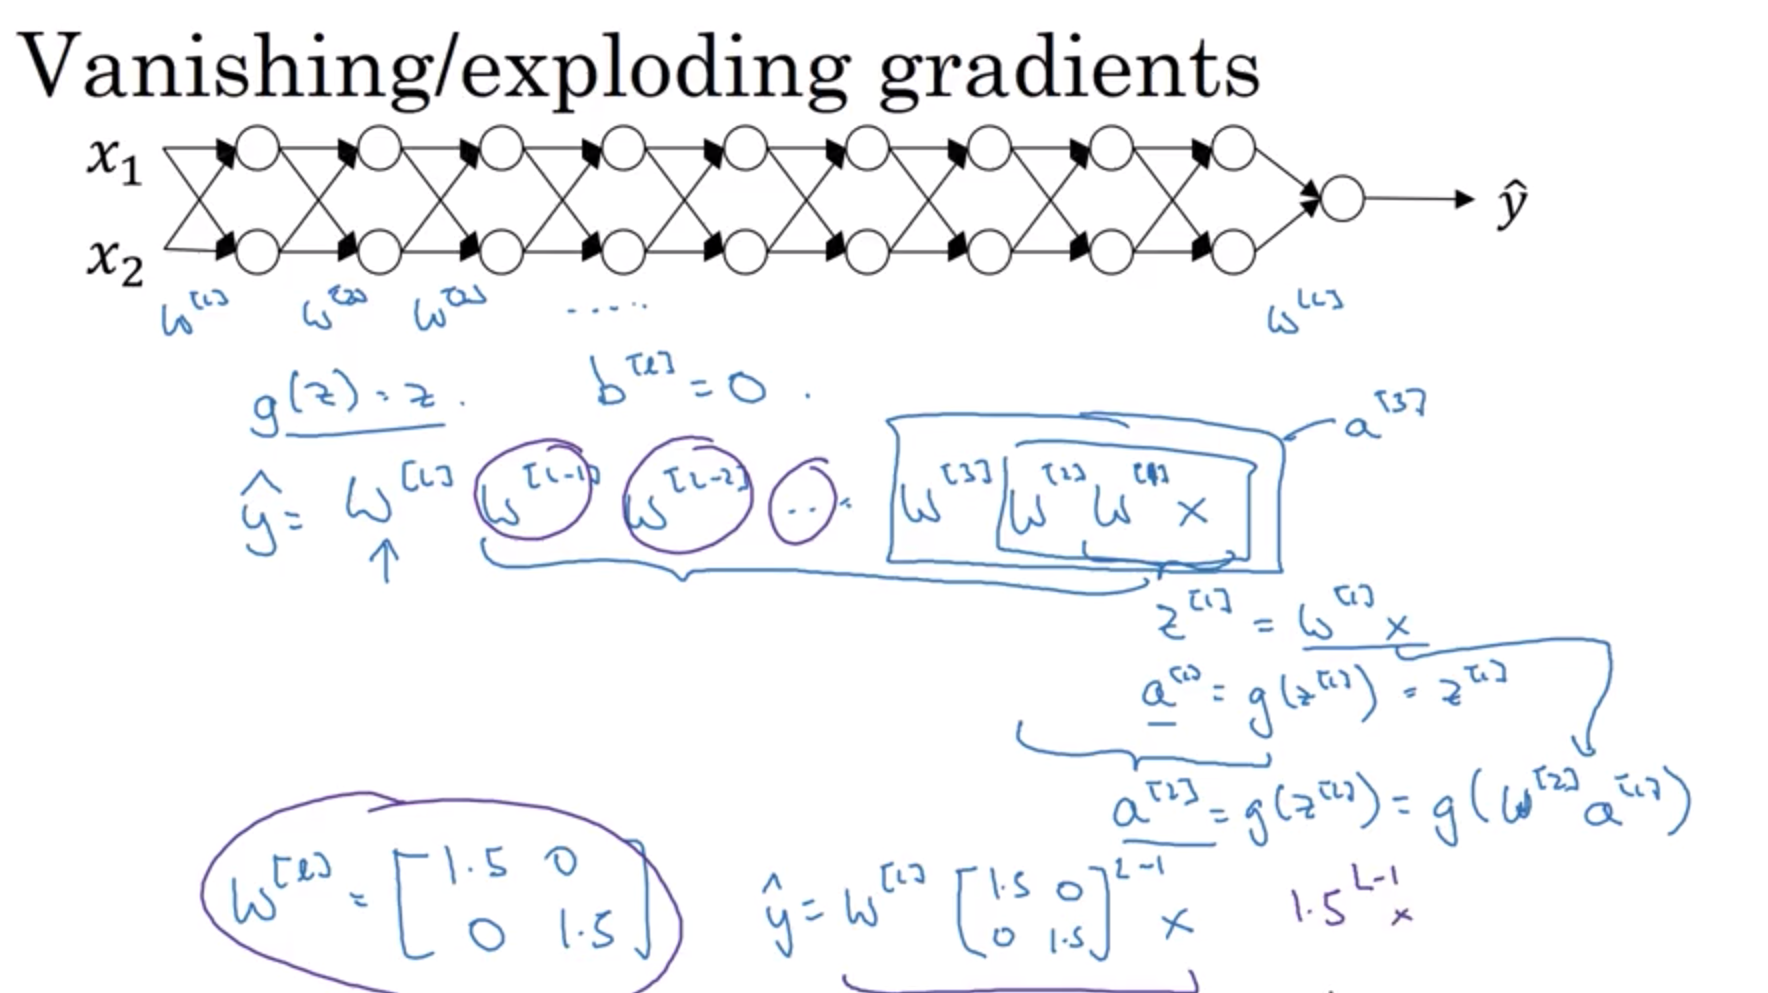

- So If W > I (Identity matrix) the activation and gradients will explode.
- And If W < I (Identity matrix) the activation and gradients will vanish
- There is a partial solution that doesn't completely solve this problem but it helps a lot - careful choice of how you initialize the weights (next video).
### Weight Initialization for Deep Networks

- A partial solution to the Vanishing/ Exploding gradients in NN is better or more careful choice of the random initialization of weights

<img src="img/Screen%20Shot%202019-01-22%20at%200.10.35.png">

=> if N is large we want W's to be smaller to not explode the cost.
One reasonable thing to do would be to set the variance of Wi to be equal to 1 over n (n is the number of input features that's going into a neuron.
- So let's say when we initialize w's like this (better to use with tanh activation):
  - np.random.rand(shape) * np.sqrt(1/n[l-1])
or variation of this:
  - np.random.rand(shape) * np.sqrt(2/(n[l-1] + n[l]))
- Setting initialization part inside sqrt to 2/n[l-1] for ReLU is better:
  - np.random.rand(shape) * np.sqrt(2/n[l-1])

- The initialization in this video is called "He Initialization/ Xavier Initialization" and has been published in 2015 paper.

### Numerical approximation of gradients
- There is an technique called gradient checking which tells you if your implementation of backpropagation is correct.
- Gradient checking approximates the gradients and is very helpful for finding the errors in your backpropagation implementation but it's slower than gradient sescent

<img src="img/Screen%20Shot%202019-01-22%20at%207.21.05.png">


<img src="img/Screen%20Shot%202019-01-22%20at%207.23.37.png">

### Gradient checking
-  First take W[1],b[1],...,W[L],b[L] and reshape into one big vector (theta)
- The cost function will be J(theta)
- Then take dW[1],db[1],...,dW[L],db[L] into one big vector (d_theta)
- Algorithm: eps = 10^-7

  <img src="img/Screen%20Shot%202019-01-22%20at%207.41.06.png">

- Finally we evaluate this formula (||d_theta_approx - d_theta||2) / (||d_theta_approx||2+||d_theta||2) # (|| - Euclidean vector norm) and check (with eps = 10^-7):
  - if it is < 10^-7 - great, very likely the backpropagation implementation is correct
  - if around 10^-5 - can be OK, but need to inspect if there are no particularly big values in d_theta_approx - d_theda vertor
  - if it is >= 10^-3 - bad, probably there is a bug in backprogapation implementation


### Gradient checking implementation notes
- Dont use the gradient checking algorithm at training time because it's very slow.
- Use gradient checking only for debugging.
- If algorithm fails grad check, look at components to try to identify the bug. 
- Don't forget to add lamda/(2m) * sum(W[l]) to J if you are using L1 or L2 regularization.
- Gradient checking doesn't work with dropout because J is not consistent.
- You can first turn off dropout (set keep_prob = 1.0), run gradient checking and then turn on dropout again.
- Run gradient checking at random initialization and train the network for a while maybe there's a bug which can be seen when w's and b's become larger (further from 0) and can't be seen on the first iteration (when w's and b's are very small).

### Regularization summary
### 1. L2 Regularization 
#### Observations:
- The value of λ is a hyperparameter that you can tune using a dev set.
- L2 regularization makes your decision boundary smoother.  If λ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

#### What is L2-regularization actually doing?:
- L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights.
- Thus, by penalizing the square values of the weights in the cost function you drive all the wights to smaller values. It becomes too costly for the cost to have large weights. This leads to a smoother model in which the output changes more slowly as the input changes.

#### What you should remember:
- Implications of L2-regularization on:
  - cost computation:
       - A regularization term is added to the cost
  - backpropagation function:
       - There are extra terms in the gradients with respect to weight matrices
  - weights:
       - weights end up smaller ("weight decay") - are pushed to smaller values.

### 2. Dropout
#### What you should remember about dropout:
- Dropout is a regularization technique.
- You only use dropout during training. Don't use dropout (randomly eliminate nodes) during test time.
- Apply dropout both during forward and backward propagation.
- During training time, divide each dropout layer by keep_prob to keep the same expected value for the activations. For example, if keep_prob is 0.5, then we will on average shut down half the nodes, so the output will be scaled by 0.5 since only the remaining half are contributing to the solution. 